# Community Health Survey

We will be working with the 'Community Health Survey' data (https://data.cityofnewyork.us/Health/Community-Health-Survey/2r9r-m6j4). According to NYC Open Data, this is a survey data that asks about health risks New Yorkers face: The survey included people of age 18 and older. The aim of this data analysis is to influence health program decisions, and improve the knowledge of the relationship between health behavior and health status. 

There are six columns of data:

* **Survey     :**   This is a survey of a sample of New York City adults.
* **Question   :**   Questions asked.
* **Year       :**   The year that the survey was conducted
* **Prevalence :**   The percent of New York City adults who have the characteristic being described
* **Lower95%CI :**   Confidence Interval (CI) is a measure of the precision of an estimate: the wider the CI, the more imprecise                  the estimate. The Lower Bound of the confidence interval is the lower threshold of imprecision.
* **Upper95%CI :**    Confidence Interval (CI) is a measure of the precision of the estimate: the wider the CI, the more imprecise the estimate. The Upper Bound of the confidence interval is the upper threshold of imprecision. 

Lets's begin by ingesting the data into a pandas DataFrame and taking a look at the first handful of rows:

In [2]:
import pandas as pd
health_survey = pd.read_csv("https://data.cityofnewyork.us/resource/2r9r-m6j4.csv")

In [3]:
health_survey.head()

,survey,question,year,prevalence,lower95_ci,upper95_ci
0,CHS,Health Insurance Coverage,2010,83.3,82.0,84.6
1,CHS,Health Insurance Coverage,2010,83.3,82.0,84.6
2,CHS,Did not get needed medical care,2010,10.3,9.4,11.4
3,CHS,Did not get needed medical care,2010,10.3,9.4,11.4
4,CHS,No Personal Doctor,2010,NaN,NaN,NaN


Let's take a peek at the data in more detail to see how many values are populated. This will help us gauge missingness. We will also be able to see the data types of the columns.

In [4]:
health_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
survey        100 non-null object
question      100 non-null object
year          100 non-null int64
prevalence    96 non-null float64
lower95_ci    96 non-null float64
upper95_ci    96 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


Not bad... 'Survey', 'question' and 'year' columns have no missing values, meanwhile 'prevalence', 'lower95_ci' and 'upper95_ci' values have 4 values missing. The last three have float values, 'survey' and 'question' columns have object values (categorical) and 'year', as one can guess, has integer values (numerical).

In [5]:
health_survey.describe().round(1)

,year,prevalence,lower95_ci,upper95_ci
count,100.0,96.0,96.0,96.0
mean,2012.0,41.5,39.9,43.0
std,1.4,27.9,27.6,28.1
min,2010.0,9.6,8.7,10.5
25%,2011.0,16.8,15.5,18.3
50%,2012.0,24.4,23.1,25.8
75%,2013.0,68.7,66.5,70.8
max,2014.0,86.2,85.2,87.2


So the survey dates between 2010 and 2014. The average prevalence is 41.5, lower95_ci is 39.9 and upper95_ci is 43. The median prevalence is 24.4, lower95_ci is 23.1 and upper95_ci is 25.8. Based on the standard deviation except the year, our data is spread out and it looks like we do not have outliers.

From now on, we're going to ignore the population estimates (the lower95_ci and upper95_ci columns) as well as the 'survey' column. Why are we deleting 'survey'? 

In [6]:
health_survey['survey'].value_counts()

CHS    100
Name: survey, dtype: int64

It has all the same value throughout!

Let's make a simplified version of our data. I'm going to use .copy, so that I know that I'm not inadvertently working in the parent DataFrame.

In [7]:
simplified_health_survey = health_survey[['question', 'year', 'prevalence']].copy()
simplified_health_survey.head()

,question,year,prevalence
0,Health Insurance Coverage,2010,83.3
1,Health Insurance Coverage,2010,83.3
2,Did not get needed medical care,2010,10.3
3,Did not get needed medical care,2010,10.3
4,No Personal Doctor,2010,NaN


Let's remove any duplicate rows:

In [8]:
clear_health_survey = simplified_health_survey.drop_duplicates(keep='first')
clear_health_survey

,question,year,prevalence
0,Health Insurance Coverage,2010,83.3
2,Did not get needed medical care,2010,10.3
4,No Personal Doctor,2010,NaN
6,Drinks 1 or more sugar-sweetened beverages per...,2010,30.3
8,Smoking Status (current smokers),2010,14.0
10,Binge Drinking,2010,NaN
12,Obesity,2010,23.4
14,"Colon cancer screening, adults age 50+ (colono...",2010,67.5
16,Self-reported Health Status (excellent/very go...,2010,79.1
18,"Flu shot in last 12 months, adults ages 65+ (n...",2010,62.3


What we have here is "long" data -- data that is organized in key-value pairs. It's not a bad way to organize data, because it allows me to reshape it in ways that are more helpful for analysis. For example, I'd like to pivot the data so that I have the question text as column headers, and the year as row indexes:

In [9]:
years_by_question = clear_health_survey.pivot(index = 'year', columns = 'question')
years_by_question

prevalence                                                       \
question Binge Drinking Colon cancer screening, adults age 50+ (colonoscopy)   
year                                                                           
2010                NaN                                               67.5     
2011               17.9                                               68.6     
2012               19.6                                               68.5     
2013               18.2                                               69.0     
2014               16.5                                               69.9     

                                          \
question Did not get needed medical care   
year                                       
2010                                10.3   
2011                                10.7   
2012                                11.1   
2013                                11.2   
2014                                 9.6   

                                                             \
question Drinks 1 or more sugar-sweetened beverages per day   
year                                                          
2010                                                   30.3   
2011                                                   29.9   
2012                                                   28.2   
2013                                                   23.3   
2014                                                   22.5   

                                                                         \
question Flu shot in last 12 months, adults ages 65+ (not age-adjusted)   
year                                                                      
2010                                                   62.3               
2011                                                   67.4               
2012                                                   61.8               
2013                                                   66.8               
2014                                                   64.2               

                                                               \
question Health Insurance Coverage No Personal Doctor Obesity   
year                                                            
2010                          83.3                NaN    23.4   
2011                          81.4               16.9    23.7   
2012                          80.2               18.3    24.2   
2013                          79.1               19.1    23.4   
2014                          86.2               15.6    24.7   

                                                                 \
question Self-reported Health Status (excellent/very good/good)   
year                                                              
2010                                                   79.1       
2011                                                   78.2       
2012                                                   78.7       
2013                                                   76.9       
2014                                                   77.8       

                                           
question Smoking Status (current smokers)  
year                                       
2010                                 14.0  
2011                                 14.8  
2012                                 15.5  
2013                                 16.1  
2014                                 13.9

Alternately, I could make years the column header, and the questions the row index:

In [10]:
questions_by_year = clear_health_survey.pivot(index = 'question', columns = 'year')
questions_by_year

prevalence              \
year                                                     2010  2011  2012   
question                                                                    
Binge Drinking                                            NaN  17.9  19.6   
Colon cancer screening, adults age 50+ (colonos...       67.5  68.6  68.5   
Did not get needed medical care                          10.3  10.7  11.1   
Drinks 1 or more sugar-sweetened beverages per day       30.3  29.9  28.2   
Flu shot in last 12 months, adults ages 65+ (no...       62.3  67.4  61.8   
Health Insurance Coverage                                83.3  81.4  80.2   
No Personal Doctor                                        NaN  16.9  18.3   
Obesity                                                  23.4  23.7  24.2   
Self-reported Health Status (excellent/very goo...       79.1  78.2  78.7   
Smoking Status (current smokers)                         14.0  14.8  15.5   

                                                                
year                                                2013  2014  
question                                                        
Binge Drinking                                      18.2  16.5  
Colon cancer screening, adults age 50+ (colonos...  69.0  69.9  
Did not get needed medical care                     11.2   9.6  
Drinks 1 or more sugar-sweetened beverages per day  23.3  22.5  
Flu shot in last 12 months, adults ages 65+ (no...  66.8  64.2  
Health Insurance Coverage                           79.1  86.2  
No Personal Doctor                                  19.1  15.6  
Obesity                                             23.4  24.7  
Self-reported Health Status (excellent/very goo...  76.9  77.8  
Smoking Status (current smokers)                    16.1  13.9

I prefer the wide format because it is easier to read and understand.

Now that I have the data in a simpler-to-understand format, I can do additional exploratory data analysis. Let's start by checking shape of our final data.

In [11]:
clear_health_survey.shape

(50, 3)

50 rows and 3 columns. Let's analyze our categorical value, 'question'.

In [12]:
question_dict = clear_health_survey.groupby('question').size()
question_dict

question
Binge Drinking                                                    5
Colon cancer screening, adults age 50+ (colonoscopy)              5
Did not get needed medical care                                   5
Drinks 1 or more sugar-sweetened beverages per day                5
Flu shot in last 12 months, adults ages 65+ (not age-adjusted)    5
Health Insurance Coverage                                         5
No Personal Doctor                                                5
Obesity                                                           5
Self-reported Health Status (excellent/very good/good)            5
Smoking Status (current smokers)                                  5
dtype: int64

We have 5 observations for each question. How has the average prevalence changed over the years? Let's do a visualization to see that..

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

Text(0.5, 0, 'year')

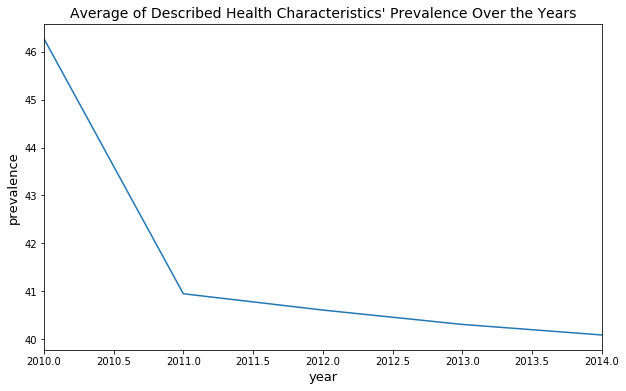

In [14]:
clear_health_survey.groupby(clear_health_survey.year).prevalence.mean().plot(figsize=(10, 6))
plt.title("Average of Described Health Characteristics' Prevalence Over the Years", fontsize=14)
plt.ylabel('prevalence', fontsize=13)
plt.xlabel('year', fontsize=13)

The prevalence of health risk characteristics found among New York City adults has dropped. However since some questions point good health habits and some bad, we can not saz whether this is good or bad. For example, let's just look at 'Binge Drinking' and how it changed over the years.

In [15]:
binge_drinking = clear_health_survey[clear_health_survey['question'] == 'Binge Drinking']
binge_drinking

,question,year,prevalence
10,Binge Drinking,2010,NaN
30,Binge Drinking,2011,17.9
50,Binge Drinking,2012,19.6
70,Binge Drinking,2013,18.2
90,Binge Drinking,2014,16.5


Text(0.5, 0, 'year')

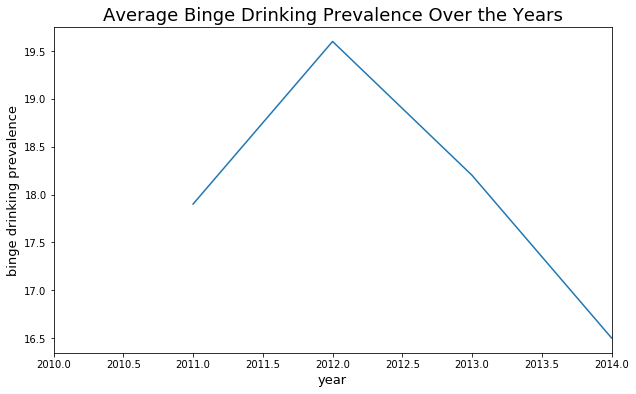

In [16]:
binge_drinking.groupby(binge_drinking.year).prevalence.mean().plot(figsize=(10, 6))
plt.title('Average Binge Drinking Prevalence Over the Years', fontsize=18)
plt.ylabel('binge drinking prevalence', fontsize=13)
plt.xlabel('year', fontsize=13)

Unlike the combined prevalence, there was a growth in 2012 but after that year it has also dropped just like other health risk characteristics.

Let's see the average of prevalence by question to get a better general idea.. 

Text(0.5, 0, ' ')

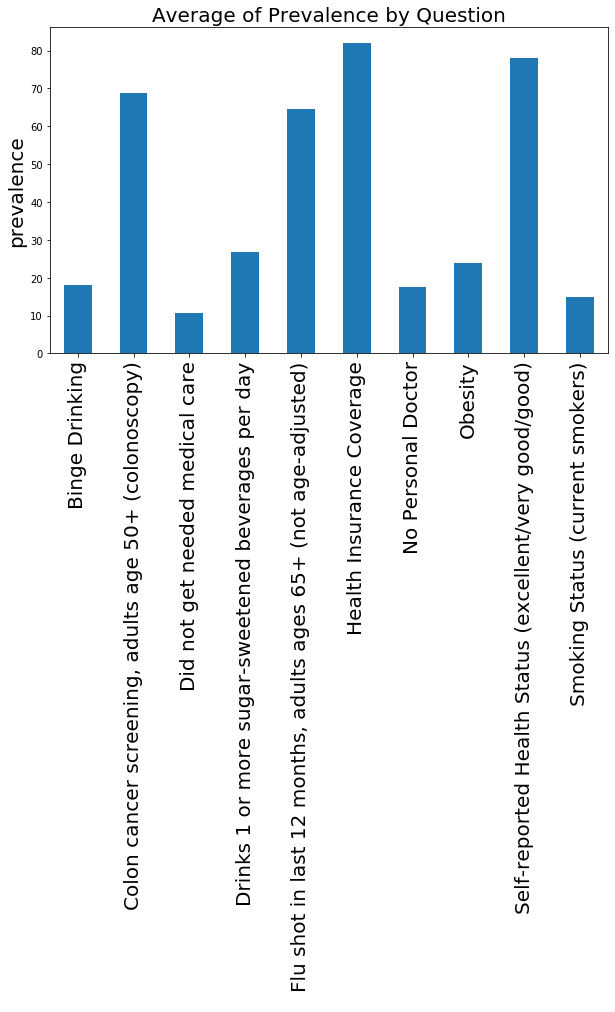

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
clear_health_survey.groupby('question').prevalence.mean().plot(kind='bar', figsize=(10, 6))
plt.ylabel('prevalence', fontsize=20)
plt.title('Average of Prevalence by Question', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.xticks(rotation=90)
plt.xlabel(' ')

'Health Insurance Coverage' and 'Self-reported Health Status (excellent/very good/good)' are in high prevalence, which is good. These are followed by 'Colon cancer screening, adults age 50+ (colonoscopy)' and 'Flu shot in last 12 months, adults ages 65+ (not age-adjusted)', which are also good. 

The prevalence for 'binge drinking', 'obesity', 'no personal doctor', 'smoking status (current smokers)', 'drinks 1 or more sugar-sweetened beverages per day', 'did not get needed medical care' are low. 

We can say that the prevalence of good health characteristics found among New York City adults are high whereas the prevalence of bad health characteristics found among New York City adults are low. Great!

## Thank you for reading!